# **Data Import**

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random

train_directory = '../input/asl_alphabet_train/asl_alphabet_train'

print("Data and packages imported")




Data and packages imported


# **CNN Structure and Summary**

In [2]:
img_input = layers.Input(shape=(200,200,3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

asl = layers.Conv2D(32, 3, activation='relu')(img_input)
asl = layers.MaxPooling2D(2)(asl)

asl = layers.Conv2D(64, 3, activation='relu')(asl)
asl = layers.MaxPooling2D(2)(asl)

asl = layers.Conv2D(128, 3, activation='relu')(asl)
asl = layers.MaxPooling2D(2)(asl)

asl = layers.Conv2D(256, 3, activation='relu')(asl)
asl = layers.MaxPooling2D(2)(asl)

asl = layers.Conv2D(512, 3, activation='relu')(asl)
asl = layers.MaxPooling2D(2)(asl)

asl = layers.Conv2D(1048, 3, activation='relu')(asl)
asl = layers.MaxPooling2D(2)(asl)


asl = layers.Flatten()(asl)
asl = layers.Dropout(0.50)(asl)

asl = layers.Dense(1048, activation='relu')(asl)





output = layers.Dense(29, activation='softmax')(asl)

model = Model(img_input, output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
__________

# **CNN  Layer Visualization**

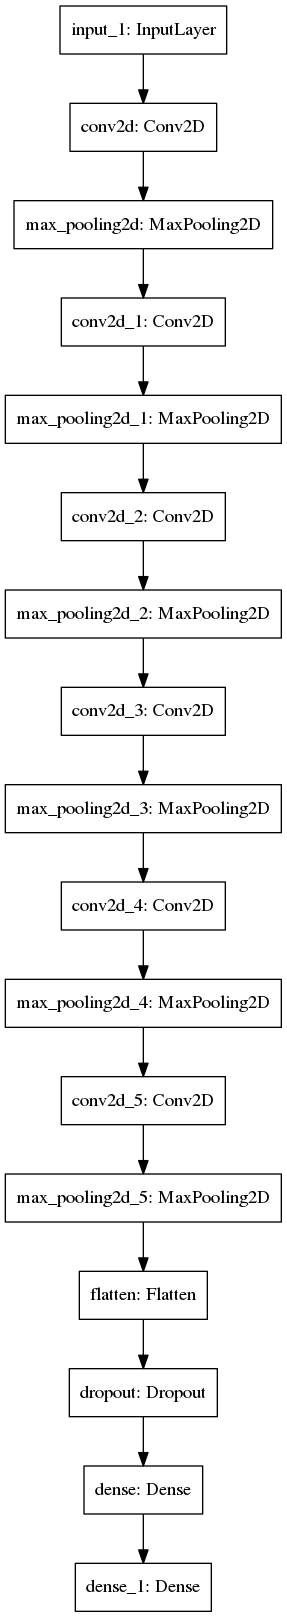

In [3]:
from tensorflow.python.keras.utils import plot_model
plot_model(model, to_file= '../working/model.png')
from IPython.display import Image
Image("../working/model.png")

In [4]:


from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=.000999),
              metrics = ['acc'])
print('Model Compiled')

Model Compiled


# **Data Prep**

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size = (200,200),
    batch_size =32,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size = (200,200),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)




Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


# **Model Execution**

In [6]:
 history = model.fit_generator(
       train_generator,
       steps_per_epoch = 50,  # 2000 images = batch_size * steps
       epochs = 30,
       validation_data = validation_generator,
       validation_steps = 50,  # 1000 images = batch_size * steps
       verbose = 2,
 )


Epoch 1/30
 - 19s - loss: 3.3674 - acc: 0.0344 - val_loss: 3.3475 - val_acc: 0.0325
Epoch 2/30
 - 14s - loss: 3.3116 - acc: 0.0519 - val_loss: 3.2454 - val_acc: 0.0938
Epoch 3/30
 - 13s - loss: 3.0955 - acc: 0.1237 - val_loss: 3.0588 - val_acc: 0.1294
Epoch 4/30
 - 13s - loss: 2.6985 - acc: 0.2031 - val_loss: 2.6895 - val_acc: 0.2244
Epoch 5/30
 - 13s - loss: 2.1819 - acc: 0.3250 - val_loss: 2.3825 - val_acc: 0.2963
Epoch 6/30
 - 13s - loss: 1.6255 - acc: 0.4813 - val_loss: 1.8146 - val_acc: 0.4313
Epoch 7/30
 - 13s - loss: 1.3017 - acc: 0.5694 - val_loss: 1.4633 - val_acc: 0.5506
Epoch 8/30
 - 13s - loss: 0.9939 - acc: 0.6663 - val_loss: 1.1770 - val_acc: 0.6481
Epoch 9/30
 - 13s - loss: 0.7833 - acc: 0.7269 - val_loss: 1.1313 - val_acc: 0.6406
Epoch 10/30
 - 13s - loss: 0.7399 - acc: 0.7512 - val_loss: 1.1082 - val_acc: 0.6481
Epoch 11/30
 - 13s - loss: 0.6522 - acc: 0.7725 - val_loss: 0.9717 - val_acc: 0.6669
Epoch 12/30
 - 13s - loss: 0.5441 - acc: 0.8137 - val_loss: 0.9079 - val_a

# ** Training History Visualization**

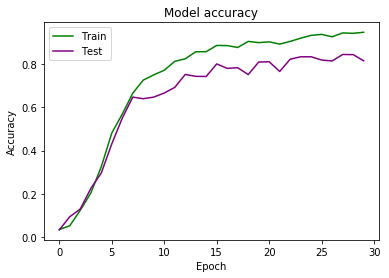

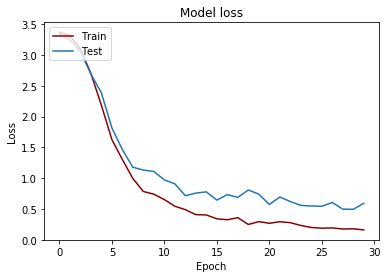

In [7]:
import matplotlib.pyplot as plt

# Ploting the training & validation accuracy values
plt.plot(history.history['acc'], c='green')
plt.plot(history.history['val_acc'], c= 'purple')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], c='DarkRed')
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()